<a href="https://colab.research.google.com/github/ShafinZidan/Diabetes-Prediction-using-multiple-classification-algorithms/blob/main/KNN_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics


In [ ]:
! pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.2 MB/s 
     |████████████████████████████████| 199 kB 51.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv?

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X0 = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y0 = diabetes_dataset['Outcome']

In [ ]:
print(X0)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y0)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


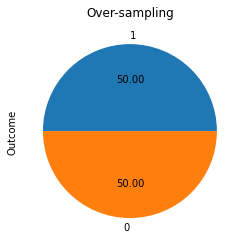

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X, Y= ros.fit_resample(X0, Y0)

ax = Y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.53662955  0.69674985  0.13964019 ...  0.11486102  0.40973141
   1.38030585]
 [-0.87332723 -1.22376295 -0.14857485 ... -0.75360639 -0.39366922
  -0.26394563]
 [ 1.10061227  1.76370141 -0.24464653 ... -1.16302674  0.54072064
  -0.17740608]
 ...
 [-1.15531859 -0.91891965  0.76410611 ...  0.58631475 -0.69639989
  -0.86972249]
 [-0.87332723 -1.13230996 -1.8778651  ...  2.76988995  0.0284072
  -0.69664339]
 [-0.87332723  1.15401481  0.13964019 ...  0.78482159  2.14170015
  -0.09086653]]


In [ ]:
X = standardized_data


In [ ]:
print(X)
print(Y)

[[ 0.53662955  0.69674985  0.13964019 ...  0.11486102  0.40973141
   1.38030585]
 [-0.87332723 -1.22376295 -0.14857485 ... -0.75360639 -0.39366922
  -0.26394563]
 [ 1.10061227  1.76370141 -0.24464653 ... -1.16302674  0.54072064
  -0.17740608]
 ...
 [-1.15531859 -0.91891965  0.76410611 ...  0.58631475 -0.69639989
  -0.86972249]
 [-0.87332723 -1.13230996 -1.8778651  ...  2.76988995  0.0284072
  -0.69664339]
 [-0.87332723  1.15401481  0.13964019 ...  0.78482159  2.14170015
  -0.09086653]]
0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 8) (800, 8) (200, 8)


Training the Model

In [ ]:
classifier = KNeighborsClassifier()

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.82125


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.77


**Precision**, **F1 Score**, **Recall**

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
# metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.7981438515081206
Recall = 0.86
F1 Score = 0.8279181708784596


In [ ]:
# metrics for test data
precision_recall_f1_score( Y_test, X_test_prediction)

Precision = 0.75
Recall = 0.81
F1 Score = 0.7788461538461539


**Cross Validation**

In [ ]:
cv_score_kn = cross_val_score(KNeighborsClassifier(), X, Y, cv=5)

print(cv_score_kn)

mean_accuracy_kn = sum(cv_score_kn)/len(cv_score_kn)

mean_accuracy_kn = mean_accuracy_kn*100

mean_accuracy_kn = round(mean_accuracy_kn, 2)

print(mean_accuracy_kn)

[0.74  0.745 0.775 0.785 0.785]
76.6


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.2546382   1.2454678   0.13964019 -0.10383724  0.72297919 -0.85285981
   0.29329654  1.4668454 ]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


**CF**

In [ ]:
con_matrix=confusion_matrix(Y_test,X_test_prediction)
print(con_matrix)

[[73 27]
 [19 81]]


In [ ]:
tn, fp, fn, tp = con_matrix.ravel()

print(tn, fp, fn, tp)

73 27 19 81


**Heatmap**

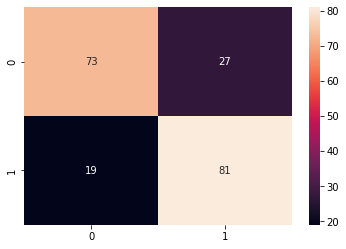

In [ ]:
sns.heatmap(con_matrix, annot=True)

**ROC Curve** & **AUC value**

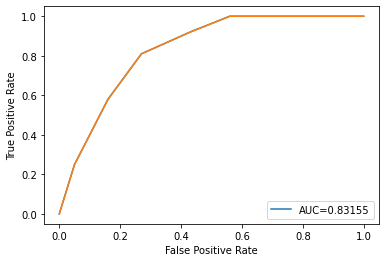

In [ ]:
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()